In [ ]:
# Task 2: Customer Segmentation

# Dataset (Recommended): Mall Customer (Kaggle
# Cluster customers into segments based on income and spending score
# Perform scaling and visual exploration of groupings
# Apply K-Means clustering and determine optimal number of clusters
# Visualize clusters using 2D plots

# Tools: Python, Pandas, Matplotlib, Seaborn, Scikit-learn
# Libraries: NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn
# Concepts: Data Preprocessing, Feature Scaling, K-Means Clustering, Elbow Method, Silhouette Score, Data Visualization
# Estimated Time: 3-4 hours
# Dataset Link: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Import kagglehub to download dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

# Load dataset
df = pd.read_csv(f"{path}/Mall_Customers.csv")
df.head()


Path to dataset files: C:\Users\knguy\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


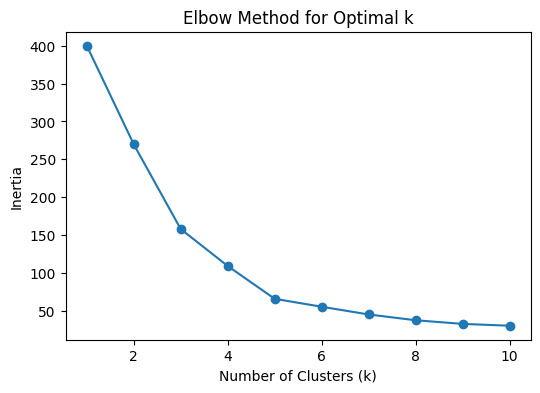

In [3]:
# Selecting, Scaling, and Visualizing Features

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


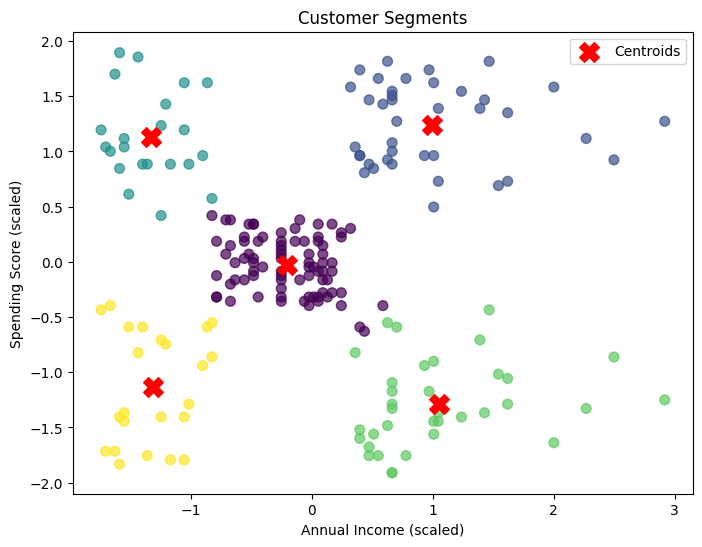

In [4]:
# Firing K-Means and Visualizing Clusters, Adding Cluster Labels, Visualizing Clusters

k_opt = 5  # <- pick from elbow curve (usually ~5)
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap="viridis", s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="red", marker="X", s=200, label="Centroids")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments")
plt.legend()
plt.show()
# The model has successfully segmented customers into distinct groups based on their annual income and spending score.

In [6]:
# Review and Check segment summary
print(df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
